# **GIAI ĐOẠN 2: TIỀN XỬ LÝ VÀ KHÁM PHÁ DỮ LIỆU**
---

## <p style="text-align: center;">**Phần 1 - Nạp các thư viện cần thiết** <a name="answer-the-question"></a></p> 

Thư viện thêm đường dẫn ở pha 1 vào trong jupyter notebook ở pha 2 để tiện lấy biến đã được tạo ở pha trước. 

In [24]:
import sys  
sys.path.insert(0, '../phase_1_data_collection')

Các thư viện dùng để xử lý trên tập dữ liệu, trực quan dữ liệu, thao tác trên dữ liệu: 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)

# Lấy biến df_credits_craw từ notebook pha trước
from ipynb.fs.full.data_collection import df_credits_raw

---
## <p style="text-align: center;">**Phần 2 - Khám phá và tiền xử lý dữ liệu** <a name="answer-the-question"></a></p> 

### <p style="text-align: center;">**2.1 - Số hàng và cột của dữ liệu:**</p>  

Trước khi làm việc trên toàn bộ tập dữ liệu thì đầu tiên nhóm em kiểm tra số dòng và số cột ban đầu của dữ liệu đó.

Số hàng và cột của dữ liệu được lưu lần lượt vào biến `credits_rows` và `credits_columns`.

In [26]:
credits_rows, credits_columns = df_credits_raw.shape

print("Số hàng của dữ liệu: ", credits_rows)
print("Số cột của dữ liệu: ", credits_columns)

Số hàng của dữ liệu:  268429
Số cột của dữ liệu:  5


### <p style="text-align: center;">**2.2 - Ý nghĩa của mỗi cột và mỗi hàng:**</p>  

Khái quát về bộ dữ liệu credits: Bộ dữ liệu này lấy từ trang JustWatch. Nhiệm vụ của nó là dùng để ghi lại thông tin của đạo diễn và diễn viên của các phim mà họ diễn/chỉ đạo trước đây.

Để có cái nhìn khái quát về dữ liệu thì đầu tiên, nhóm em phải xem sơ qua về 5 dòng đầu tiên cùng các thuộc tính chính của nguyên bộ dữ liệu credits:

In [27]:
df_credits_raw.head()

,person_id,id,name,character,role
0,59401,ts20945,Joe Besser,Joe,ACTOR
1,31460,ts20945,Moe Howard,Moe,ACTOR
2,31461,ts20945,Larry Fine,Larry,ACTOR
3,21174,tm19248,Buster Keaton,Johnny Gray,ACTOR
4,28713,tm19248,Marion Mack,Annabelle Lee,ACTOR



Để ghi lại thông tin, bảng dữ liệu sử dụng các thuộc tính sau đây:
- **persion_id** (cột thứ nhất): ID người diễn viên/đạo diễn trên JustWatch.
- **id** (cột thứ hai): ID bộ phim trên JustWatch.
- **name** (cột thứ ba): Tên của đạo diễn hoặc diễn viên.
- **character** (cột thứ tư): Tên nhân vật người đó đóng.
- **role** (cột thứ năm): Vai trò là ACTOR (diễn viên) hay DIRECTOR (đạo diễn).

Như vậy, với mỗi dòng khác nhau, ta có được thông tin về tên thật, tên nhân vật, vai trò,... của một diễn viên hay một đạo diễn phim nào đó. Các hàng không có điểm gì bất thường (ngoại trừ bị trùng lắp).

### <p style="text-align: center;">**2.3 - Về việc trùng lặp các hàng:**</p>  

Kiểm tra việc trùng lặp dữ liệu sẽ giảm thiểu được các vấn đề tiềm ẩn như là: lãng phí tài nguyên lưu trữ, bộ dữ liệu trở nên bị nhiễu, gây ra các nhầm lẫn... 

Để phân tích dữ liệu được rõ ràng và chính xác hơn, nhóm tiến hành đếm bộ dữ liệu có bao nhiêu hàng trùng lắp (lưu vào biến `num_duplicate_data`) và xóa những hàng đó đi bằng các hàm của pandas.

In [28]:
# Đếm số giá trị trùng.
num_duplicate_data = df_credits_raw.duplicated().sum()
print("Số giá trị bị trùng lắp: ", num_duplicate_data)

Số giá trị bị trùng lắp:  4249


---
**TIỀN XỬ LÝ DỮ LIỆU**: XÓA CÁC HÀNG TRÙNG

In [29]:
df_credits = df_credits_raw.drop_duplicates()

### <p style="text-align: center;">**2.4 - Kiểu dữ liệu mỗi cột:**</p>  
Việc lựa chọn kiểu dữ liệu phù hợp sẽ làm cho các tác vụ phân tích tránh bị lỗi, dễ dàng, lựa chọn các hàm và thư viện phù hợp để xử lý nó.

Trước khi tiến hành tiền xử lý, sử dụng hàm `open_object_dtype(s)` để lấy ra kiểu dữ liệu thực sự mà các cột đang chứa:

In [30]:
# Sử dụng hàm aply để lấy kiểu dữ liệu thực sự:
def open_object_dtype(s):
    dtypes = set()
    
    func = lambda e: dtypes.add(type(e))
    s.apply(func)
    
    return dtypes

Kiểu dữ liệu mong muốn dựa trên dữ liệu:

In [31]:
df_credits_columns = df_credits.columns.to_list() 
for col in df_credits_columns:
    print(col, ":", open_object_dtype(df_credits[col]))

person_id : {<class 'int'>}
id : {<class 'str'>}
name : {<class 'str'>}
character : {<class 'float'>, <class 'str'>}
role : {<class 'str'>}


Xuất ra kiểu dữ liệu lúc chưa xử lý:

In [32]:
dtypes = df_credits.dtypes
dtypes

person_id     int64
id           object
name         object
character    object
role         object
dtype: object

Như vậy, dựa vào kết quả trả ra của hàm trên, nhóm em thấy kỳ vọng về kiểu dữ liệu mong muốn khớp hoàn toàn với kiểu dữ liệu gốc.

### <p style="text-align: center;">**2.5 - Thống kê sự thiếu dữ liệu của DataFrame:**</p>  

Để xem cột nào có bao nhiêu giá trị bị thiếu, nhóm em sử dụng phương thức `info` từ pandas để trả ra các bộ thống kê bao gồm tổng số dữ liệu không thiếu của một cột và kiểu của cột đó.

Dựa vào bảng thống kê này, nhóm em còn nhận thấy được thuộc tính **character** bị thiếu rất nhiều dữ liệu và sẽ được đề cập ở các bước sau.

In [33]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264180 entries, 0 to 77800
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   person_id  264180 non-null  int64 
 1   id         264180 non-null  object
 2   name       264180 non-null  object
 3   character  233894 non-null  object
 4   role       264180 non-null  object
dtypes: int64(1), object(4)
memory usage: 12.1+ MB


### <p style="text-align: center;">**2.6 - Độ quan trọng của thuộc tính:**</p>  

Việc xóa những thuộc tính không quan trọng sẽ giúp cho bộ dữ liệu không bị rối và quá trình tính toán được nhanh hơn hơn do bỏ bớt thuộc tính không cần xét tới.

Để xóa được các thuộc tính đó, trước tiên nhóm em xác định xem những thuộc tính nào không quan trọng cũng như các tác vụ khám phá dữ liệu kế tiếp có đề cập đến nó nữa hay không:
- Các cột **name**, **character**, **role**, **id** còn khai thác được rất nhiều ở pha 3 - phân tích dữ liệu.
- Cột còn lại là **person_id** không cần thiết lắm cho các quá trình sau vì đã có cột **name** đại diện cho một diễn viên/đạo diễn và đồng thời thuộc tính này không có điểm chung để gộp bảng với bộ dữ liệu titles. Như vậy, nhóm tiến hành xóa cột này:

---
**TIỀN XỬ LÝ DỮ LIỆU**: XÓA CỘT KHÔNG CẦN THIẾT

In [34]:
df_credits.drop('person_id', inplace=True, axis=1, errors='ignore')

### <p style="text-align: center;">**2.7 - Phân loại thuộc tính:**</p>  
- Thuộc tính category có duy nhất thuộc tính **role** để phân loại vai trò ACTOR hay DIRECTOR của một người.
- Các thuộc tính còn lại không xét đến phân phối giá trị của nó mà nhóm chỉ quan tâm vào **role**.

#### <p style="text-align: center;">**2.7.1 - Phân phối các giá trị trong thuộc tính category:**</p>  

Bộ dữ liệu credits chỉ có cột character là bị thiếu dữ liệu (thiếu đến 30286), các cột còn lại đều đây đủ.

In [35]:
null_columns = df_credits.isnull().sum()
null_columns

id               0
name             0
character    30286
role             0
dtype: int64

Tỷ lệ phần trăm dữ liệu bị thiếu trong các cột (dường như cũng là cột phân loại) được tính như sau:

In [36]:
def missing_ratio(c):
    return c.isnull().sum() / c.__len__() * 100

df_credits[null_columns[null_columns.values > 0].keys()].agg(missing_ratio).round(2)

character    11.46
dtype: float64

Phần trăm tỷ lệ thiếu của cột **character** khá là ít, không ảnh hưởng nhiều đến tổng thể.

Để giải thích cho sự thiếu dữ liệu thì chúng thuộc phân loại DIRECTOR (đạo diễn), không có tên nhân vật, chỉ những ACTOR tham gia đóng phim mới có.

### <p style="text-align: center;">**2.8 - Khám phá dữ liệu từng cột:**</p>  

#### <p style="text-align: center;">**2.8.1 - Khám phá dữ liệu cột name:**</p> 
Cột **name** chứa tên diên viên/đạo diễn của một bộ phim. Như vậy, tên có thể trùng vì họ có thể đóng hoặc đạo diễn cho nhiều phim.

Đoạn code bên dưới tiến hành đếm tần xuất xuất hiện của những cái tên có trong bộ dữ liệu, có lẽ sẽ để dành cho pha sau (tìm top 10 diễn viên hoặc đạo diễn tham gia đóng/đạo diễn bộ phim).

In [37]:
df_credits['name'].value_counts()

Grey DeLisle                80
Frank Welker                74
Kevin Michael Richardson    64
Tara Strong                 62
Bess Flowers                60
                            ..
Aaron Maynard                1
Sydney Peterson              1
Griffin Duy                  1
Paul Milotte                 1
Julian Gaviria               1
Name: name, Length: 144587, dtype: int64

Vậy, có tất cả bao nhiêu đạo diễn và diễn viên hết tất cả và họ là ai?

In [38]:
print("Số diễn viên, đạo diễn: ", df_credits['name'].nunique())

Số diễn viên, đạo diễn:  144587


In [39]:
# Mảng chứa các diễn viên, đạo diễn:
list_creator_actor = df_credits['name'].unique()
list_creator_actor

array(['Joe Besser', 'Moe Howard', 'Larry Fine', ...,
       'Luz Stella Luengas', 'Isabel Gaona', 'Julian Gaviria'],
      dtype=object)

#### <p style="text-align: center;">**2.8.2 - Khám phá dữ liệu cột character:**</p> 

Cột character chứa tên của các nhân vật mà diễn viên đóng. Vì đạo diễn sẽ không đóng phim nên thuộc tính này của họ là giá trị rỗng. Việc tính toán giá trị rỗng sẽ khó khăn hơn khi nó chỉ là một thông tin trống không, vậy nên nhóm em sẽ dùng hàm fillna để fill NaN cho các dữ liệu thiếu.

Đầu tiên, tìm số lượng nhân vật và các nhân vật diên viên đóng:

In [40]:
print("Số nhân vật mà diễn viên đóng: ", df_credits['character'].nunique())

Số nhân vật mà diễn viên đóng:  145601


In [41]:
# Mảng chứa các tên nhân vật:

list_character = df_credits['character'].unique()
list_character

array(['Joe', 'Moe', 'Larry', ..., 'María Paz', 'Karen Bayona', 'Cacica'],
      dtype=object)

---
**TIỀN XỬ LÝ DỮ LIỆU:** FILL NAN VÀO DỮ LIỆU THIẾU

In [42]:
df_credits['character'] = df_credits['character'].fillna('None')

#### <p style="text-align: center;">**2.8.3 - Khám phá dữ liệu cột role:**</p> 

Ở đây, nhóm em chỉ đếm số lượng đạo diễn và diễn viên để xem bộ dữ liệu nghiêng về bên nào hơn.

In [43]:
df_credits['role'].value_counts()

ACTOR       248640
DIRECTOR     15540
Name: role, dtype: int64

plot biểu đồ tròn xem phần trăm đạo diễn/diễn viên chiếm bao nhiêu trên tổng số người:

([<matplotlib.patches.Wedge at 0x7f7591c7e800>,
 [Text(-1.2975244942544102, 0.2425493492257541, 'ACTOR'),
  Text(1.2975244970930488, -0.24254933404037807, 'DIRECTOR')],
 [Text(-0.7077406332296783, 0.1322996450322295, '94.1%'),
  Text(0.7077406347780265, -0.13229963674929712, '5.9%')])

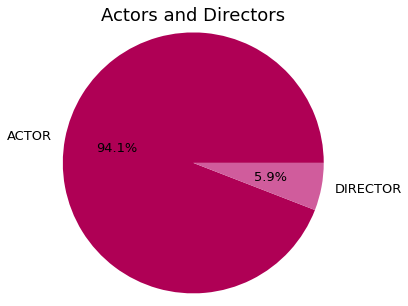

In [44]:
plt.figure(figsize=(8, 5))
plt.title('Actors and Directors', fontsize=18)
plt.pie(df_credits['role'].value_counts(),
        labels=['ACTOR', 'DIRECTOR'],
        textprops={'fontsize': 13},
        radius=1.2, startangle=0,
        colors=['#af0055', '#D05C9C'],
        autopct='%.1f%%')

In [45]:
df_credits.set_index('name')

,id,character,role
name,,,
Joe Besser,ts20945,Joe,ACTOR
Moe Howard,ts20945,Moe,ACTOR
Larry Fine,ts20945,Larry,ACTOR
Buster Keaton,tm19248,Johnny Gray,ACTOR
Marion Mack,tm19248,Annabelle Lee,ACTOR
...,...,...,...
Adelaida Buscato,tm1059008,María Paz,ACTOR
Luz Stella Luengas,tm1059008,Karen Bayona,ACTOR
Inés Prieto,tm1059008,Fanny,ACTOR


---
HẾT PHA 2 CỦA FILE CREDITS